# Handwritten Digits Classifier

## Image Data

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits_data = load_digits()
digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
labels = pd.Series(digits_data['target'])
data = pd.DataFrame(digits_data['data'])
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


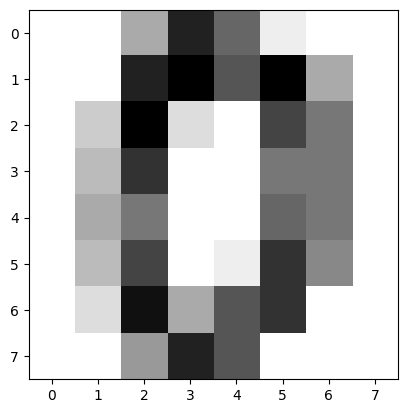

In [4]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

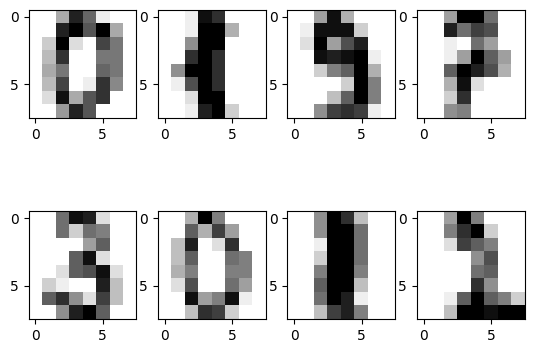

In [5]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbours Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    simple_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return simple_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        simple_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(simple_accuracy)
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9888728037614452

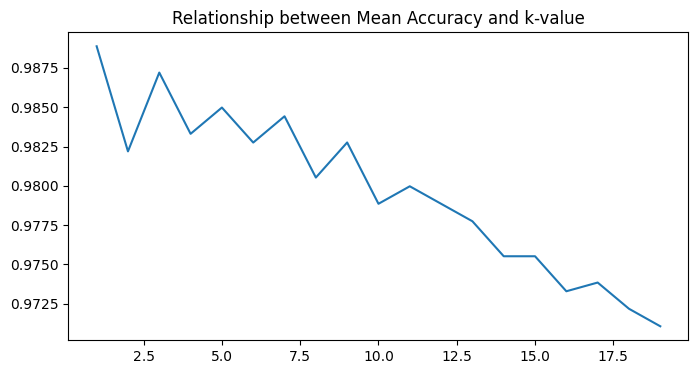

In [7]:
k_values = list(range(1,20))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Relationship between Mean Accuracy and k-value")
plt.plot(k_values, k_overall_accuracies)

As shown above, mean accuracy appears to decrease in k-values, indicating a low k-value is optimal.

Note: k-nearest neighbours algorithms feature high memory usage (each unknown observation involves many comparisons with known observations), and not much model representation to explore or debug.

## Neural Network with One Hidden Layer

In [10]:
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

#4-fold cross validation
def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        simple_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(simple_accuracy)
    return fold_accuracies

/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer

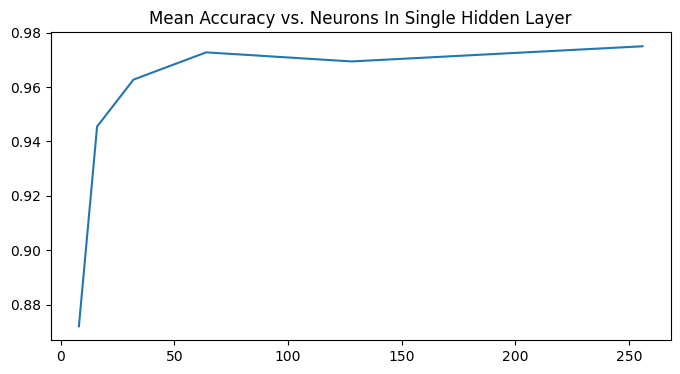

In [12]:
#Training and testing using 8, 16, 32, 64, 128 and 256 neurons in the hidden layer respectively
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

From the graph above, it would seem that adding more neurons to the single hidden layer improved accuracy up to approximately 97%. 

Note: the simple accuracy computed here only tells us the number of correct classifications the model made, and does not consider the recall or precision of the model.

Additionally, the k-nearest neighbours achieved approximately 98% accuracy for k<8, which means a shallow neural network with a single hidden layer does not appear to outperform typical standalone supervised machine learning algorithms for this problem.

## Neural Network with Two Hidden Layers

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1min 51s


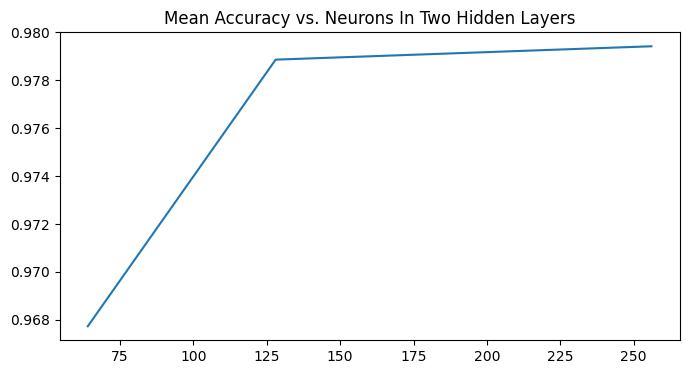

In [14]:
%%time
nn_two_neurons = [
    (64, 64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [15]:
nn_two_accuracies

[0.9677307597129424, 0.9788591932689928, 0.9794172234595397]

Here, using two hidden layers improved simple accuracy to about 98%. Even though overfitting is a possibility, using four-fold cross validation also gives us some assurance that the model is still generalizing to achieve the improved accuracy over the single hidden layer networks.

## Neural Network with Three Hidden Layers

In [16]:
#6-fold cross validation
def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        simple_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(simple_accuracy)
    return fold_accuracies

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4min 4s


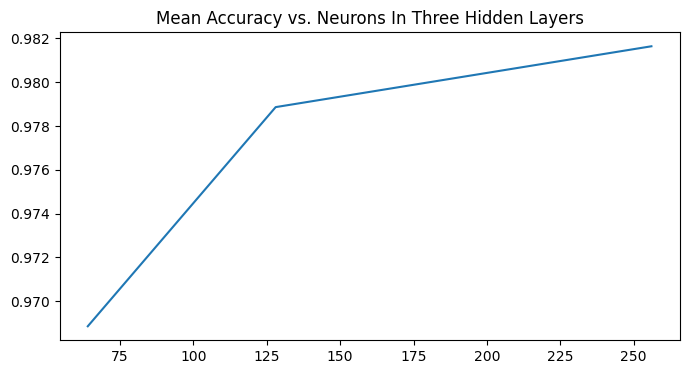

In [17]:
%%time
nn_three_neurons = [
    (64, 64, 64),
    (128, 128, 128),
    (256, 256, 256)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [18]:
nn_three_accuracies

[0.9688517279821628, 0.9788647342995169, 0.981644370122631]

## Summary

Even with 6-fold cross validation, three hidden layers achieved a simple accuracy of around 98%. However, this still outperforms two hidden layers at 128 neurons per layer (0.9766 < 0.9811). The tradeoff is that the computing power required for three hidden layers at the same number of nodes is much larger. This is demonstrated, by proxy, by the disparate wall time- 2 vs. 4 minutes. 

## Possible Improvements

To improve the accuracy and performance of this digits classifier, I would propose the following approaches:

- Increase the number of hidden layers or neurons: Experiment with adding more hidden layers or increasing the number of neurons in each layer. This can help the model learn more complex representations and potentially improve accuracy. However, be cautious not to overfit the model to the training data.

- Adjust the learning rate: The learning rate determines the step size during the optimization process. A higher learning rate can help the model converge faster, but it may also result in overshooting the optimal solution. On the other hand, a lower learning rate can lead to slower convergence but might help the model find a better solution. Experiment with different learning rates to find an optimal value.

- Normalize input data: Preprocess the input data by normalizing it. This can involve scaling the pixel values to a specific range (e.g., 0-1) or applying standardization techniques such as mean normalization. Normalizing the data can help the model converge faster and improve overall performance.

- Try different activation functions: MLPClassifier allows you to specify different activation functions for the hidden layers. Experiment with different activation functions, such as 'relu', 'tanh', or 'sigmoid', to see if they improve the model's performance. Different activation functions can have varying effects on the model's ability to learn complex patterns.

- Increase the training data: If possible, try to increase the size of the training dataset. More training examples can provide the model with more diverse patterns to learn from, potentially improving its generalization performance.

- Regularisation techniques: Consider adding regularisation techniques such as L1 or L2 regularisation to prevent overfitting. These techniques introduce a penalty term to the loss function, which helps control the complexity of the model.

- Feature engineering: Experiment with different ways of representing the input data, such as image augmentation, feature scaling, or dimensionality reduction methods like Principal Component Analysis (PCA) to enhance the model's ability to extract meaningful features.

- Grid search and cross-validation: Use grid search and cross-validation techniques to find the optimal hyperparameters for the model. This approach involves systematically exploring different combinations of hyperparameters to identify the best configuration that maximizes performance.